#Projeto 03 de Inteligência Artificial


Universidade Federal do Sul e Sudeste do Pará 

Faculdade de Computação e Engenharia Elétrica 

Inteligência Artificial – Prof. Dr. Elton Alves 

Projeto 3 – Redes Neurais Artificiais 
 
### Objetivo: 
- Desenvolver uma aplicação prática de emprego de RNA MLP (SEM CLONAGEM – 
IDEIA INOVADORA). 

### Critérios: 
- Deve ser realizado em equipes (no máximo três membros), utilizando uma ferramenta de sua preferência. 
- O trabalho deve aplicar um método de normalização para os dados de entrada. 
- O trabalho deve utilizar uma técnica de validação cruzad (generalização da RNA). 
- Escolher uma métrica para mostrar o desempenho da RNA. 
- Encontrar a melhor topologia para a solução do problema. 
- Nota = 4 pts. 
- Data da entrega e apresentação: 03/05/2022. 
▪ Critérios avaliativos 
✔ Relevância da proposta (0,5 pt). 
✔ Escrita científica (0,5 pt) 
✔ Artigo template IEEE: 3-4 páginas (0,5 pt). 
✔ Descrever de forma clara e objetiva a metodologia adotada, 
referencial  teórico,  conclusões  e  referências  bibliográficas  (0,5 
pts). 
✔ Resultados obtidos com o RNA (2 pt) 
 
 
 
 

Metodologia do script

- Primeiro inicializamos a função de RNA-MLP disponível na biblioteca sklearn

- Segundo Iincializamos os arrays e carregamos os dados de dataset
- Para isso foi utilizado um dataset encontrado no site: https://archive.ics.uci.edu/ml/datasets/Letter+Recognition

Data Set Characteristics:  
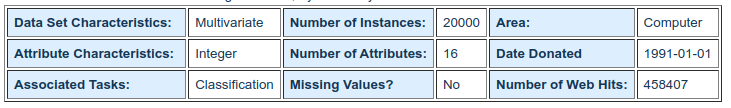

- Com para aplicarmos a técnica de validação cruzada foi separado as 20.000 (20 mil linhas X 16 colunas de entrada X 1 coluna de saída) de amostra de dados em conjuntos de mini datasets com 2000 linhas totalizando 10 datasets com isso podemos treinar a rede neural de 10 formas diferentes e testar com 2000 amostras de outros datasets. Com isso gera-se um relatório sobre o nível de generalização da rede neural.

- Para métricas de desempenho podemos escolher 13 letras (metade do alfabeto completo) e verificar o desempenho delas utilizando as técnicas de validação cruzada.

- A partir dos resultados iremos ajustar os parâmetros da rede realizando novos testes e verificando qual topologia (modelo ou configuração) possui expressivamente o melhor resultado.

## Conceitos importantes

### Generalização

- Habilidade para realizar predições para padrões de entrada que não fazem parte dos padrões utilizados para treinamento, mas que foram gerados da mesma distribuição entrada/saída que estes.
- Considerada uma das maiores vantagens da rede neural.
- Pobre generalização ( sub-treinamento e sobre-treinamento)

### Pobre generalização:
- Underfitting (sub-treinamento) complexidade da rede neural é inferior a complexidade do fenômeno que está sendo modelado. 
 - O modelo tem um alto valor de bias.
- Overfitting (sobre-treinamento) complexidade da rede neural é maior que a complexidade do fenômeno que está sendo modelado.
 - O modelo tem um valor alto de variância.

### Técnica para evitar o overfitting

#### Validação Cruzada (Parada antecipada)
- Dados divididos em três grupos: treino, validação e teste.
- Grande número de dados disponível.
- Conjunto de validação 
  - Usado para testar a generalização da rede durante o treinamento.
  - Se erro de validação aumenta, isto pode indicar sobre-treino e o treinamento deve ser então finalizado.

## Inicializando bibliotecas

In [1]:
from sklearn.neural_network import MLPClassifier
# from google.colab import drive

## Inicializando arrays

In [2]:
inputs = []
outputs = []
letter_outputs = []
inputs.append([])
outputs.append([])
letter_outputs.append([])

In [3]:
# drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Processamento de Dados

In [4]:
letter_recognition = open("/home/mestrezen/Documents/graduacao/Per-odo-8-facul/INTELIGENCIA-ARTIFICIAL/TRABALHOS/Projeto-3/Projeto/dataset/letter-recognition.data", "r")
letter_recognition = letter_recognition.readlines()
letter_convert = open("/home/mestrezen/Documents/graduacao/Per-odo-8-facul/INTELIGENCIA-ARTIFICIAL/TRABALHOS/Projeto-3/Projeto/dataset/letter-convert.data", "r")
letter_convert = letter_convert.readlines()
# 16 parametros inputs
# 1 parametro saida
dataset_separator = 0
indicates_next_dataset = 0
for letter_recognition_line in letter_recognition:
    letter_recognition_line = letter_recognition_line.replace("\n", "").split(",")
    if dataset_separator < 2000:
        inputs[indicates_next_dataset].append(list(map(int, letter_recognition_line[1:15])))
        
        for letter_convert_line in letter_convert:
            letter_convert_line = letter_convert_line.replace("\n", "").split(",")
            if letter_convert_line[0] == letter_recognition_line[0]:
                outputs[indicates_next_dataset].append([int(letter_convert_line[1])])
                letter_outputs[indicates_next_dataset].append([letter_convert_line[0]])
                break    
        dataset_separator +=1
    else:
        inputs.append([])
        outputs.append([])
        letter_outputs.append([])
        dataset_separator = 0
        indicates_next_dataset += 1

## Resultado do Processamento

In [5]:
# print('inputs: ' + str(inputs) + '\n' + 'numero inputs' + str(len(inputs)) + '\n'+ 'outputs: ' + str(outputs) + '\n' + 'numero outputs' + str(len(outputs)))
print("\n")
# print(outputs)
print('inputs[0]: ' + str(inputs[0]) + '\n' + 'numero inputs[0]: ' + str(len(inputs[0])) + '\n'+ 'outputs[0]: ' + str(outputs[0]) + '\n' + 'numero outputs[0]: ' + str(len(outputs[0])))




inputs[0]: [[2, 8, 3, 5, 1, 8, 13, 0, 6, 6, 10, 8, 0, 8], [5, 12, 3, 7, 2, 10, 5, 5, 4, 13, 3, 9, 2, 8], [4, 11, 6, 8, 6, 10, 6, 2, 6, 10, 3, 7, 3, 7], [7, 11, 6, 6, 3, 5, 9, 4, 6, 4, 4, 10, 6, 10], [2, 1, 3, 1, 1, 8, 6, 6, 6, 6, 5, 9, 1, 7], [4, 11, 5, 8, 3, 8, 8, 6, 9, 5, 6, 6, 0, 8], [4, 2, 5, 4, 4, 8, 7, 6, 6, 7, 6, 6, 2, 8], [1, 1, 3, 2, 1, 8, 2, 2, 2, 8, 2, 8, 1, 6], [2, 2, 4, 4, 2, 10, 6, 2, 6, 12, 4, 8, 1, 6], [11, 15, 13, 9, 7, 13, 2, 6, 2, 12, 1, 9, 8, 1], [3, 9, 5, 7, 4, 8, 7, 3, 8, 5, 6, 8, 2, 8], [6, 13, 4, 7, 4, 6, 7, 6, 3, 10, 7, 9, 5, 9], [4, 9, 6, 7, 6, 7, 8, 6, 2, 6, 5, 11, 4, 8], [6, 9, 8, 6, 9, 7, 8, 6, 5, 7, 5, 8, 8, 9], [5, 9, 5, 7, 6, 6, 11, 7, 3, 7, 3, 9, 2, 7], [6, 9, 5, 4, 3, 10, 6, 3, 5, 10, 5, 7, 3, 9], [3, 4, 4, 3, 2, 8, 7, 7, 5, 7, 6, 8, 2, 8], [7, 10, 5, 5, 2, 6, 8, 6, 8, 11, 7, 11, 2, 8], [6, 11, 6, 8, 5, 6, 11, 5, 6, 11, 9, 4, 3, 12], [2, 2, 3, 3, 1, 10, 6, 3, 6, 12, 4, 9, 0, 7], [1, 3, 2, 2, 1, 8, 8, 2, 5, 14, 5, 8, 0, 7], [4, 5, 5, 4, 4, 7, 7, 6, 6,

## Etapa de Treino e Validação

In [ ]:
redeNeural = MLPClassifier(verbose=(True), 
                           max_iter=1000,
                           tol=0.001,
                           activation='logistic',
                           learning_rate_init=0.1,
                           solver='sgd') #cria a RNA
#verbose mostra o erro gerado pela RNA
#max_iter é o número máximo de épocas
#tol é a tolerância
# activation é a função de ativação
#learning_rate_init=0.3 é a taxa de aprendizagem
#Solver é o algoritmo utilizado para atualização dos pesos
redeNeural.fit(inputs[0], outputs[0]) #Treinamento da RNA


Iteration 1, loss = 3.22533596
Iteration 2, loss = 2.98099578


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 3, loss = 2.64577556
Iteration 4, loss = 2.31907674
Iteration 5, loss = 2.06310186
Iteration 6, loss = 1.86552109
Iteration 7, loss = 1.71422345
Iteration 8, loss = 1.59782441
Iteration 9, loss = 1.50892190
Iteration 10, loss = 1.43719204
Iteration 11, loss = 1.38200340
Iteration 12, loss = 1.33740906
Iteration 13, loss = 1.29710354
Iteration 14, loss = 1.25048146
Iteration 15, loss = 1.22066698
Iteration 16, loss = 1.19516958
Iteration 17, loss = 1.16209177
Iteration 18, loss = 1.12818886
Iteration 19, loss = 1.12049620
Iteration 20, loss = 1.09126386
Iteration 21, loss = 1.06942450
Iteration 22, loss = 1.04066267


## Etapa de Teste

In [ ]:
hits = 0 #erros
hits_all = 0
misses = 0 #acertos
misses_all = 0
for input_list_number in range(len(inputs)):
    if input_list_number > 0:
        for input_number in range(len(inputs[input_list_number])):
            output_predict = redeNeural.predict([inputs[input_list_number][input_number]]) #fazer a previsão

            for letter_convert_line in letter_convert:
                letter_convert_line = letter_convert_line.split(",")
                if int(letter_convert_line[1]) == int(output_predict[0]):
                    output_predict = letter_convert_line[0]
                    break 
            if str(letter_outputs[input_list_number][input_number][0]) == str(output_predict):
                hits +=1
            else:
                misses += 1
        print("\n==========")
        print("Total analisado no conjunto: "+ str(hits + misses))
        print("Resultado conjunto " + str(input_list_number) + ": " + str(hits) + " acertos e " + str(misses) + " erros")
        porcentage_hits = (hits/len(inputs[input_list_number]))*100
        porcentage_misses = (misses/len(inputs[input_list_number]))*100
        print("Porcentagem de acertos: " + str(porcentage_hits) + "%" + "\nPorcentagem de erros: " + str(porcentage_misses) + "%")
        print("==========")
        hits_all += hits
        misses_all += misses
        hits = 0
        misses = 0

print("\n==========")
print("Total analisado: "+ str(hits_all + misses_all))
print("Resultado geral: " + str(hits_all) + " acertos e " + str(misses_all) + " erros")
porcentage_hits = (hits_all/len(inputs))*100
porcentage_misses = (misses_all/len(inputs))*100
print("Porcentagem de acertos: " + str(porcentage_hits) + "%" + "\nPorcentagem de erros: " + str(porcentage_misses) + "%")
print("==========\n")